### 背景：銀行想要提高將有債務的客戶轉換為貸款戶的轉換率，行銷部門要推出鼓勵申請貸款的推廣活動  
# 目標：找出去年有申請貸款的人的特徵，作為今年推銷貸款的主要客群

### 匯入軟件和資料

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/bank__loan.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


### 欄位：  
- Experience 年資
- Family 家庭人數
- CCAvg 平均每個月信用卡花費
- Education 教育程度(1=undergraduate 2=graduate 3=advance)
- Personal Loan 去年有無申請貸款
- Securities Account 在銀行有無證券戶頭
- CD Account 在銀行有無儲蓄戶頭
- Online 有無使用網銀

### 了解資料組成

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 資料清理

刪除不必要欄位

In [6]:
df = df.drop('ID', axis=1)

把CCAvg裡的斜線改成小數點，並把類型轉成浮點數

In [7]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')

In [8]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

Experience小於0的資料有52筆，數量大於1%不能刪除，故替換為中位數

In [9]:
df[df['Experience']<0].shape[0]

52

In [10]:
med = df.loc[df['Experience']>=0, 'Experience'].median()
df.loc[df['Experience']<0, 'Experience'] = med

郵遞區號應為五位數，僅有一筆的郵遞區號有誤(比例小於1%)，故刪除該行  
相同城市有不同的郵遞區號，不利於統計分析，故將郵遞區號轉換成城市名稱

In [11]:
df[df['ZIP Code']<90000]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [12]:
df = df[df['ZIP Code']>90000]

In [13]:
import pgeocode
nomi = pgeocode.Nominatim('us')
cities=[]
for zips in df['ZIP Code']:
    info = nomi.query_postal_code(zips)
    cities.append(info.place_name)
df['city']=cities

In [14]:
df=df.drop('ZIP Code', axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

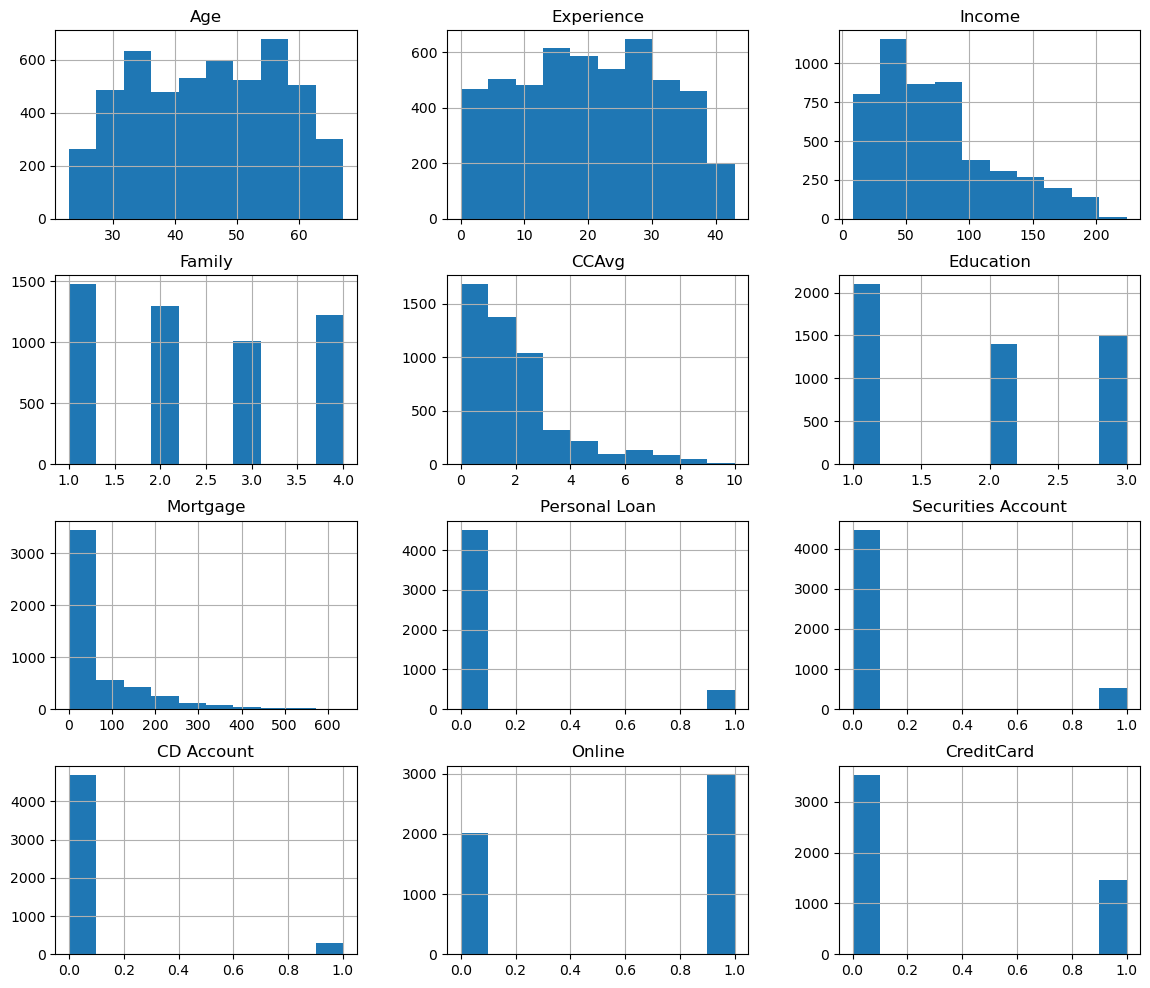

In [15]:
df_num = df.select_dtypes(include='number')
df_num.hist(figsize=(14,12))

In [16]:
df[['Income', 'Mortgage', 'CCAvg']].skew()

Income      0.841200
Mortgage    2.103688
CCAvg       1.598195
dtype: float64

In [17]:
a = ['Income', 'CCAvg', 'Mortgage']
for col in a:
    df['log_'+col]=np.log1p(df[col])

收入的分布略呈右偏，少部分客戶的高收入導致分布不對稱，使用平均值代表中心時可能會被拉高  
房貸和信用卡平均花費的分布高度右偏，代表有極少數的超高房貸和信用卡花費  
將上述三者的數據轉換為Log以利後續分析

## 探索性分析：找出 personal loan 去年有接受的客戶有什麼共通性

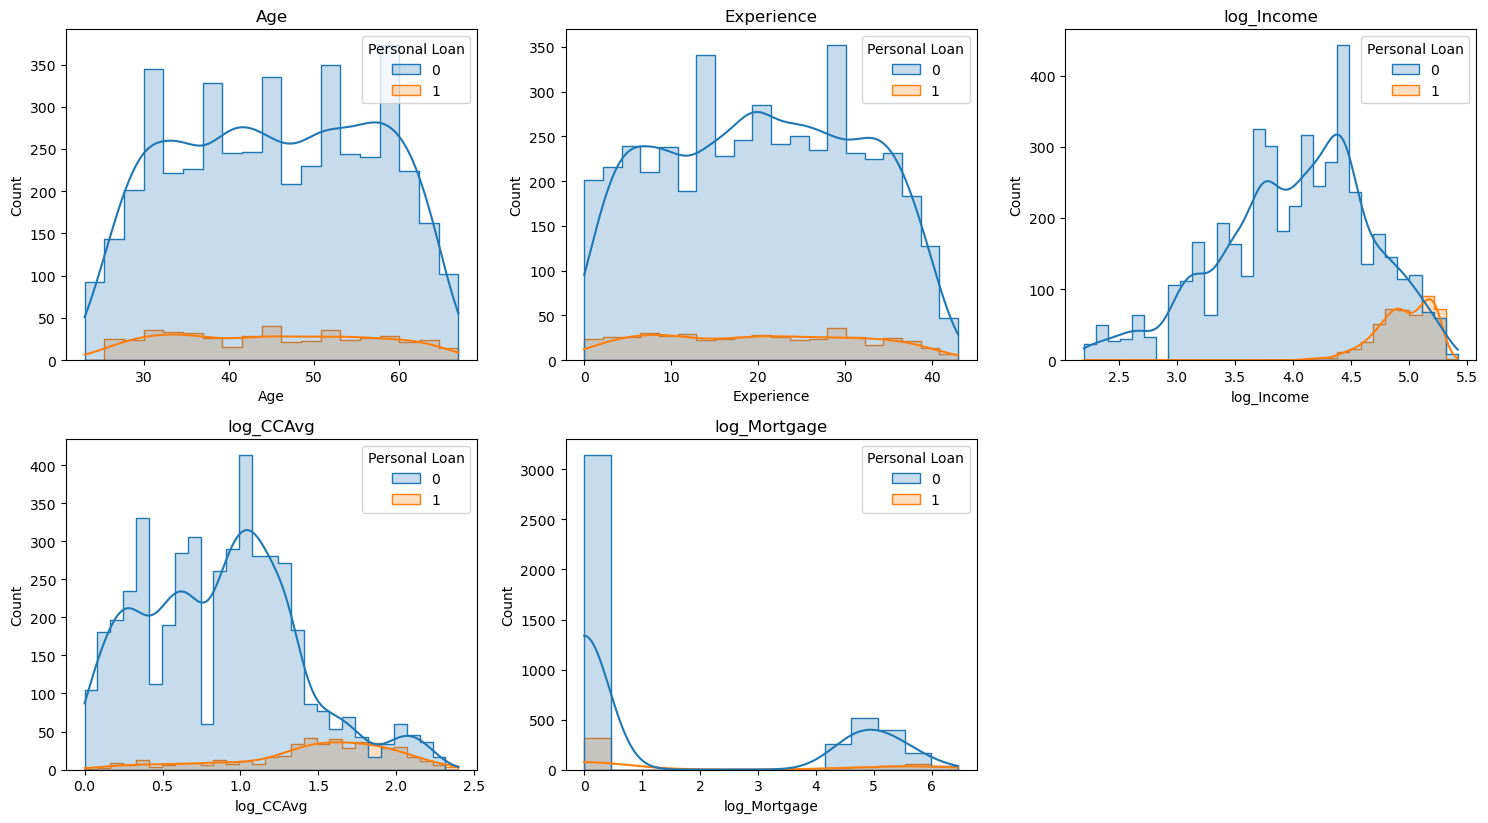

In [18]:
b=['Age', 'Experience', 'log_Income', 'log_CCAvg', 'log_Mortgage']
plt.figure(figsize=(15,12))
for i, col in enumerate(b):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df,x=col, hue='Personal Loan', kde=True, element='step')
    plt.title(col)
plt.tight_layout()

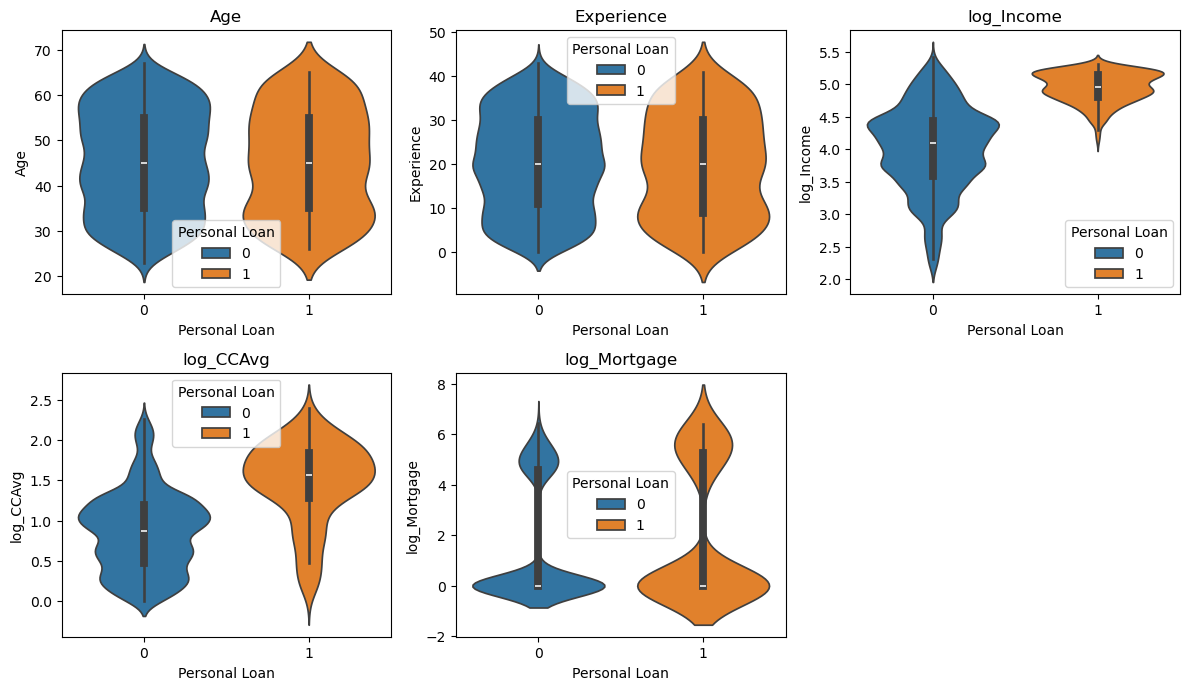

In [19]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(b):
    plt.subplot(3,3,i+1)
    sns.violinplot(data=df, y=col, x='Personal Loan', hue='Personal Loan')
    plt.title(col)
plt.tight_layout()

<Axes: >

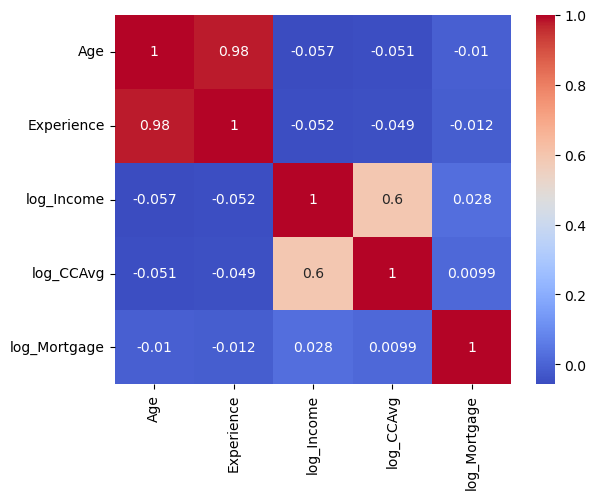

In [20]:
b=['Age', 'Experience', 'log_Income', 'log_CCAvg', 'log_Mortgage']
matrix=df[b].corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')

## 收入和信用卡消費金額

### 從上圖可看出申請貸款和沒申請的客戶之間，收入和信用卡消費金額有明顯差異，收入和信用卡消費較高的人較傾向申請貸款  

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

for col in['Income', 'CCAvg']:
    model = DecisionTreeClassifier(max_depth=1)
    model.fit(df[[col]], df['Personal Loan'])
    threshold = model.tree_.threshold[0].round(2)
    print(col, threshold)

Income 113.5
CCAvg 2.95


### 透過決策樹知道收入超過113.5、信用卡每月消費超過2.95的人較易申請貸款

## 年紀和年資

In [22]:
bins=[0,40,50,60,70]
labels=['20-30s', '40s', '50s', '60s']
df['agebin']=pd.cut(df['Age'], bins=bins, labels=labels)

<Axes: xlabel='agebin', ylabel='count'>

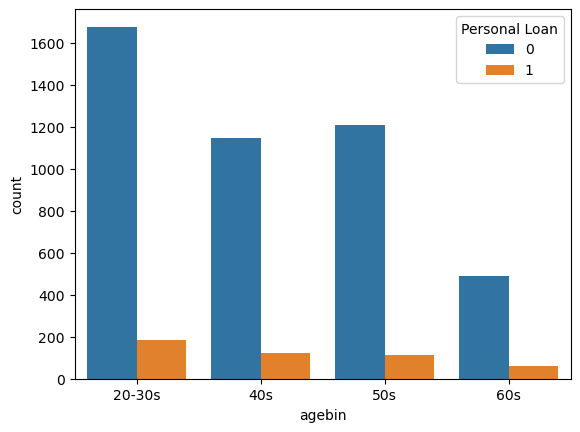

In [23]:
sns.countplot(data=df, x='agebin', hue='Personal Loan')

In [24]:
df.groupby('agebin', observed=False)['Personal Loan'].mean().round(3).reset_index()

,agebin,Personal Loan
0,20-30s,0.099
1,40s,0.096
2,50s,0.087
3,60s,0.108


從熱力圖看出年資和年紀成正比，但先前資料清理時將年資小於0的資料替換成中位數，替換效果不理想  
因此將錯誤的數據替換為該年齡層的中位數，較符合成正比的規律

In [25]:
df.loc[(df['Age']<30)&(df['Experience']>10), 'Experience']=df[df['Age']<30]['Experience'].mode()[0]

<Axes: xlabel='agebin', ylabel='Experience'>

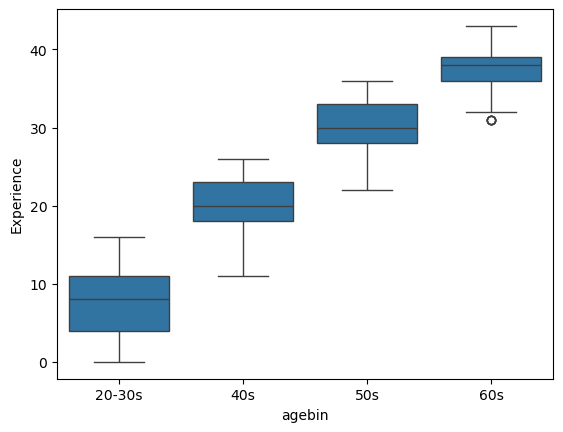

In [26]:
sns.boxplot(data=df, x='agebin', y='Experience')

In [27]:
for num in ['20-30s', '60s']:
    low=df[df['agebin']==num]['Experience'].quantile(0.25)
    high=df[df['agebin']==num]['Experience'].quantile(0.75)
    print(f'{num} 年資 {low}-{high}')

20-30s 年資 4.0-11.0
60s 年資 36.0-39.0


雖然年紀並不是影響申請貸款與否的主要因素，但各年齡分層之間的申請率差異是值得參考，上表可看出年紀在40歲以下和60歲以上的貸款率高於40-50歲的人  
而年資和年紀成正比，因此年資也可作為指標
### 針對年紀40歲以下或60歲以上的客戶，或年資介於4-11年或36-39年的客戶，也可納入推廣活動的目標客戶

## 房貸金額

從小提琴圖看出房貸金額的人口分布大多在-1到1之間和5到6之間，該圖是房貸金額經過log轉換後畫出，故將log後的數值轉換回原始金額

In [28]:
for num in [-1,1,5,6]:
    ranges=np.exp(num).round(2)
    print(ranges)

0.37
2.72
148.41
403.43


申請和沒有申請貸款的客戶之間，房貸金額沒有明顯差異，但兩族群中都有很多人的房貸金額落在以下兩個區間：0.37-2.72和148.41-403.43  
### 針對房貸金額落在0.37-2.72或148.41-403.43客戶，亦可多推銷貸款活動

## 城市

In [29]:
df['city'].nunique()

244

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Pasadena'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Berkeley'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'San Diego'),
  Text(5, 0, 'Monterey'),
  Text(6, 0, 'Santa Barbara'),
  Text(7, 0, 'Santa Clara'),
  Text(8, 0, 'Stanford'),
  Text(9, 0, 'Sacramento'),
  Text(10, 0, 'Davis'),
  Text(11, 0, 'La Jolla'),
  Text(12, 0, 'San Jose'),
  Text(13, 0, 'Oakland'),
  Text(14, 0, 'Palo Alto')])

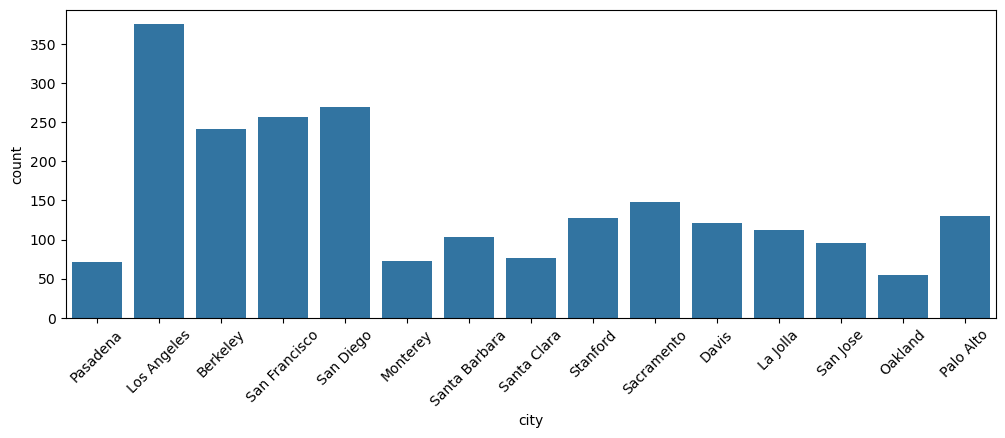

In [30]:
thirtycity=df['city'].value_counts()[:15].index
plt.figure(figsize=(12,4))
sns.countplot(data=df[df['city'].isin(thirtycity)], x='city')
plt.xticks(rotation=45)

資料中共包含244個不同的城市，要找出適合進行推廣貸款活動的城市，故選出貸款率和人口數皆高於平均值的城市，這樣既能找出轉換率高、貸款較適合該地區的城市，也能達到規模效應

In [31]:
ct=df.groupby('city').agg(
    loan_rate=('Personal Loan', 'mean'),
    population=('city', 'count')
).reset_index().sort_values(by='loan_rate', ascending=False)
goodcity=ct[(ct['loan_rate']>ct['loan_rate'].mean())&(ct['population']>ct['population'].mean())]
goodcity.shape[0]

31

In [32]:
goodcity.sort_values(by='loan_rate', ascending=False).head(3)

,city,loan_rate,population
196,Santa Clarita,0.227273,22
105,Los Altos,0.166667,36
235,Walnut Creek,0.160000,25


In [33]:
goodcity.sort_values(by='population', ascending=False).head(3)

,city,loan_rate,population
106,Los Angeles,0.101333,375
17,Berkeley,0.112033,241
170,Sacramento,0.087838,148


### 人口數及貸款率皆高於平均的城市有31個，從中挑選人口數和貸款率分別為前三名的城市作為推廣活動的主要目標

## 教育程度、家庭人數、銀行產品及服務

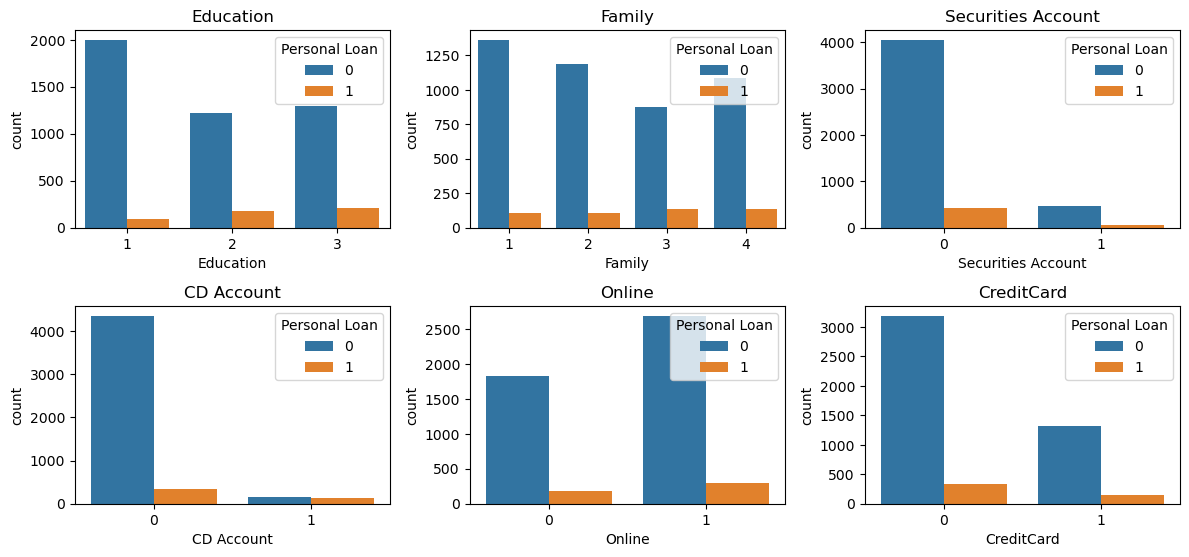

In [34]:
obj = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
plt.figure(figsize=(12,8))
for i, col in enumerate(obj):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, hue='Personal Loan')
    plt.title(col)
plt.tight_layout()

In [45]:
for col in obj:
    rate=df.groupby(col)['Personal Loan'].mean().reset_index()
    print(rate)

   Education  Personal Loan
0          1       0.044370
1          2       0.129722
2          3       0.136667
   Family  Personal Loan
0       1       0.072690
1       2       0.081790
2       3       0.131683
3       4       0.109746
   Securities Account  Personal Loan
0                   0       0.093813
1                   1       0.114943
   CD Account  Personal Loan
0           0       0.072387
1           1       0.463576
   Online  Personal Loan
0       0       0.093750
1       1       0.097553
   CreditCard  Personal Loan
0           0       0.095467
1           1       0.097345


從貸款申請率的差異可推測，是否申請貸款和教育程度、家庭人數及有無儲蓄戶頭有關  
### 教育程度研究所以上、家庭人數大於兩人或有儲蓄戶頭的人，比較傾向申請貸款

和貸款率沒有直接關係的因素為有無證券戶、是否使用網銀和有無信用卡，交叉比對任兩項的貸款率，發現同時有證券戶和網銀的貸款率有提高，同時有證券戶和信用卡的貸款率也有提高

In [52]:
pd.pivot_table(df, index='Securities Account', columns='Online', values='Personal Loan', aggfunc='mean')

Online,0,1
Securities Account,,
0,0.093664,0.093914
1,0.094527,0.127726


In [53]:
pd.pivot_table(df, index='Securities Account', columns='CreditCard', values='Personal Loan', aggfunc='mean')

CreditCard,0,1
Securities Account,,
0,0.093304,0.095023
1,0.113456,0.118881


In [54]:
pd.pivot_table(df, index='Online', columns='CreditCard', values='Personal Loan', aggfunc='mean')

CreditCard,0,1
Online,,
0,0.089636,0.103741
1,0.099429,0.093076


# 結論：  
## 針對符合以下任一條件的客戶，可作為推銷銀行貸款活動的主要目標  
- ### 收入超過113.5
- ### 信用卡每月消費超過2.95
- ### 來自Santa Clarita、Los Altos、Walnut Creek、Los Angeles、Berkeley或Sacramento
- ### 教育程度研究所以上
- ### 家庭人數大於兩人
- ### 有儲蓄戶頭
## 而符合以下目標的客戶可作為次要目標：
- ### 年齡40歲以下或60歲以上
- ### 年資介於4-11年或36-39年之間
- ### 房貸金額落在0.37-2.72或148.41-403.43之間
### 其他可能可以提高申請貸款率的方法：
- 鼓勵有證券戶的客戶使用網銀或申請信用卡